In [2]:
import os

In [3]:
anger_dir = os.path.join("./data/train/anger/")
disgust_dir = os.path.join("./data/train/disgust/")
fear_dir = os.path.join("./data/train/fear/")
happiness_dir = os.path.join("./data/train/happiness/")
neutral_dir = os.path.join("./data/train/neutral/")
sadness_dir = os.path.join("./data/train/sadness/")
surprise_dir = os.path.join("./data/train/surprise/")

print('total training anger images:', len(os.listdir(anger_dir)))
print('total training disgust images:', len(os.listdir(disgust_dir)))
print('total training fear images:', len(os.listdir(fear_dir)))
print('total training happiness images:', len(os.listdir(happiness_dir)))
print('total training neutral images:', len(os.listdir(neutral_dir)))
print('total training sadness images:', len(os.listdir(sadness_dir)))
print('total training surprise images:', len(os.listdir(surprise_dir)))

anger_files = os.listdir(anger_dir)
print(anger_files[:10])

disgust_files = os.listdir(disgust_dir)
print(disgust_files[:10])

fear_files = os.listdir(fear_dir)
print(fear_files[:10])

happiness_files = os.listdir(happiness_dir)
print(happiness_files[:10])

neutral_files = os.listdir(neutral_dir)
print(neutral_files[:10])

sadness_files = os.listdir(sadness_dir)
print(sadness_files[:10])

surprise_files = os.listdir(surprise_dir)
print(surprise_files[:10])


total training anger images: 1411
total training disgust images: 662
total training fear images: 479
total training happiness images: 1950
total training neutral images: 644
total training sadness images: 1369
total training surprise images: 1085
['anger1.jpg', 'anger10.jpg', 'anger100.jpg', 'anger1000.jpg', 'anger1001.jpg', 'anger1002.jpg', 'anger1003.jpg', 'anger1004.jpg', 'anger1005.jpg', 'anger1006.jpg']
['disgust1.jpg', 'disgust10.jpg', 'disgust100.jpg', 'disgust101.jpg', 'disgust102.jpg', 'disgust103.jpg', 'disgust104.jpg', 'disgust105.jpg', 'disgust106.jpg', 'disgust107.jpg']
['fear1.jpg', 'fear10.jpg', 'fear100.jpg', 'fear101.jpg', 'fear102.jpg', 'fear103.jpg', 'fear104.jpg', 'fear105.jpg', 'fear106.jpg', 'fear107.jpg']
['happiness1.jpg', 'happiness10.jpg', 'happiness100.jpg', 'happiness1000.jpg', 'happiness1001.jpg', 'happiness1002.jpg', 'happiness1003.jpg', 'happiness1004.jpg', 'happiness1005.jpg', 'happiness1006.jpg']
['neutral1.jpg', 'neutral10.jpg', 'neutral100.jpg', 'neut

./data/train/anger/anger10.jpg


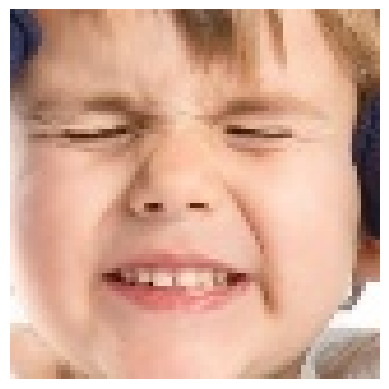

./data/train/anger/anger100.jpg


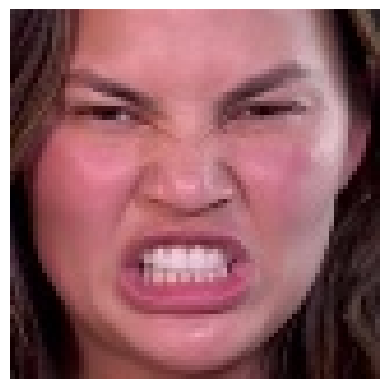

./data/train/disgust/disgust10.jpg


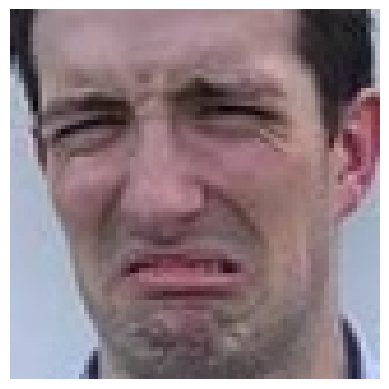

./data/train/disgust/disgust100.jpg


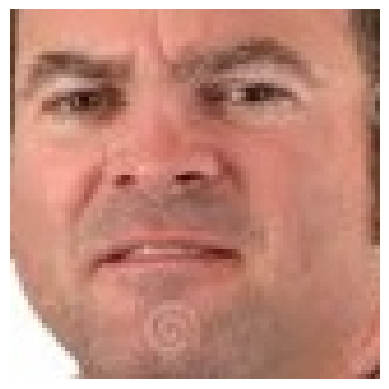

./data/train/fear/fear10.jpg


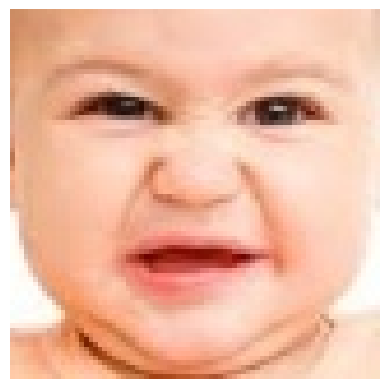

./data/train/fear/fear100.jpg


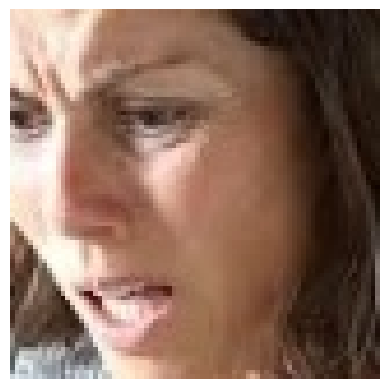

./data/train/happiness/happiness10.jpg


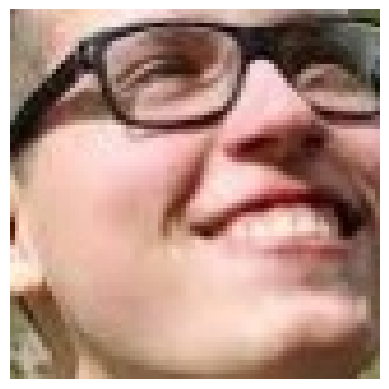

./data/train/happiness/happiness100.jpg


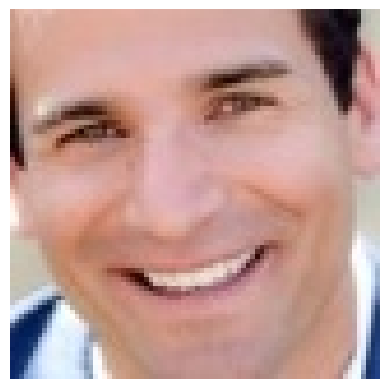

./data/train/neutral/neutral10.jpg


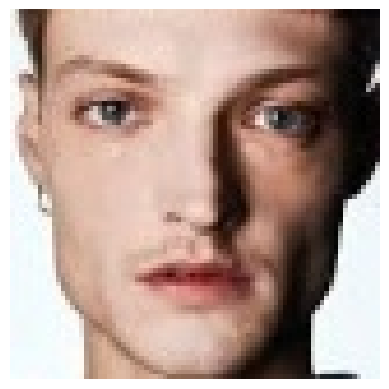

./data/train/neutral/neutral100.jpg


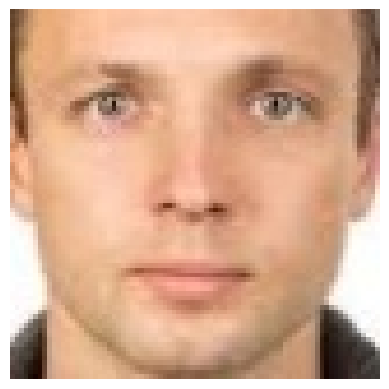

./data/train/sadness/sadness10.jpg


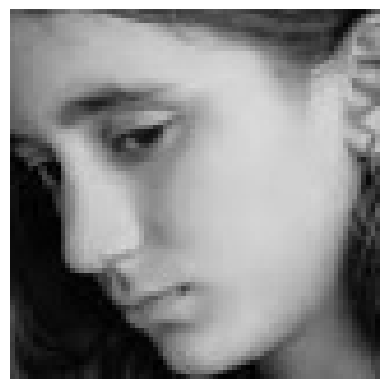

./data/train/sadness/sadness100.jpg


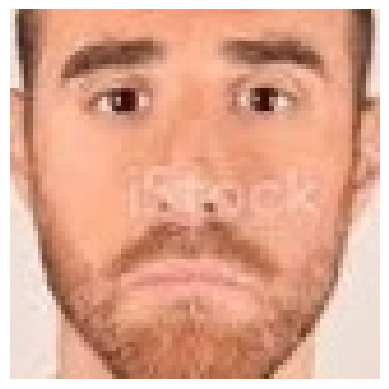

./data/train/surprise/surprise10.jpg


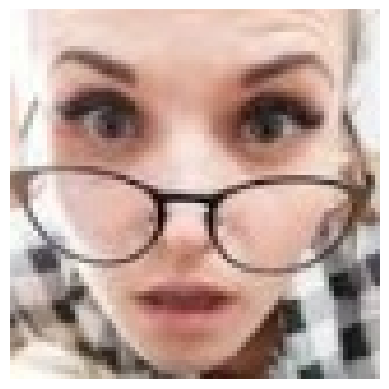

./data/train/surprise/surprise100.jpg


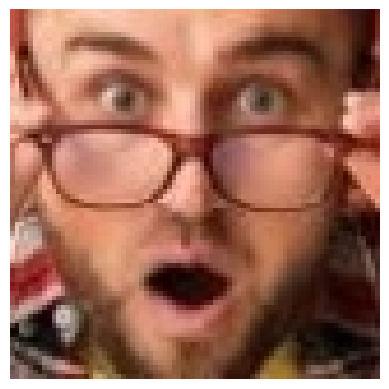

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 3

nex_anger = [os.path.join(anger_dir, fname)
                for fname in anger_files[pic_index-2:pic_index]]
nex_disgust = [os.path.join(disgust_dir, fname)
                for fname in disgust_files[pic_index-2:pic_index]]
nex_fear = [os.path.join(fear_dir, fname)
                for fname in fear_files[pic_index-2:pic_index]]
nex_happiness = [os.path.join(happiness_dir, fname)
                for fname in happiness_files[pic_index-2:pic_index]]
nex_neutral = [os.path.join(neutral_dir, fname)
                for fname in neutral_files[pic_index-2:pic_index]]
nex_sadness = [os.path.join(sadness_dir, fname)
                for fname in sadness_files[pic_index-2:pic_index]]
nex_surprise = [os.path.join(surprise_dir, fname)
                for fname in surprise_files[pic_index-2:pic_index]]

for i, img_path in enumerate(nex_anger+nex_disgust+nex_fear+nex_happiness+nex_neutral+nex_sadness+nex_surprise):
  print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [5]:
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator

# Image generators generating the image batches for training and
# validation of the model

SHAPE = 180
EPOCHS = 25
NUM_CLASSES = 7

# Configure the training image generator
TRAINING_DIR = "./data/train/"
training_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

# Configure the validation image generator
VALIDATION_DIR = "./data/test/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

# Set the image size and batch size for training and validation
# generators 
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(SHAPE,SHAPE),
    class_mode='categorical',
    batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(SHAPE,SHAPE),
    class_mode='categorical',
    batch_size=126
)



Found 7600 images belonging to 7 classes.
Found 1860 images belonging to 7 classes.


In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image SHAPExSHAPE with
    # 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(SHAPE, SHAPE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128 , (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    # tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # The sixth convolution
    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=EPOCHS, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("emotion.h5")

In [6]:
# Model STARTS HERE
inputs = tf.keras.Input(shape=(SHAPE, SHAPE, 3))

# Entry block
x = tf.keras.layers.Rescaling(1.0 / 255)(inputs)
x = tf.keras.layers.Conv2D(128, 3, strides=2, padding="same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)

previous_block_activation = x  # Set aside residual

for size in [256, 512, 728]:
    x = tf.keras.layers.Activation("relu")(x)
    x = tf.keras.layers.SeparableConv2D(size, 3, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)

    x = tf.keras.layers.Activation("relu")(x)
    x = tf.keras.layers.SeparableConv2D(size, 3, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)

    x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)

    # Project residual
    residual = tf.keras.layers.Conv2D(size, 1, strides=2, padding="same")(
        previous_block_activation
    )
    x = tf.keras.layers.add([x, residual])  # Add back residual
    previous_block_activation = x  # Set aside next residual

x = tf.keras.layers.SeparableConv2D(1024, 3, padding="same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

if NUM_CLASSES == 2:
    activation = "sigmoid"
    units = 1
else:
    activation = "softmax"
    units = NUM_CLASSES

x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(units, activation=activation)(x)

model = tf.keras.Model(inputs, outputs)

# tf.keras.utils.plot_model(model, show_shapes=True)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 180, 180, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 90, 90, 128)  3584        ['rescaling[0][0]']              
                                                                                                  
 batch_normalization (BatchNorm  (None, 90, 90, 128)  512        ['conv2d[0][0]']             

In [7]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]

model.compile(loss= "binary_crossentropy", optimizer=tf.keras.optimizers.Adam(1e-3), metrics=['accuracy'])

history = model.fit(train_generator, epochs=EPOCHS, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3, callbacks=callbacks)

model.save("emotion2.h5")

Epoch 1/25
20/20 [==============================] - 744s 37s/step - loss: 0.4448 - accuracy: 0.2425 - val_loss: 0.6658 - val_accuracy: 0.2619
Epoch 2/25
20/20 [==============================] - 465s 23s/step - loss: 0.3993 - accuracy: 0.2946 - val_loss: 0.6560 - val_accuracy: 0.2672
Epoch 3/25
16/20 [=======================>......] - ETA: 2:16 - loss: 0.3970 - accuracy: 0.2912

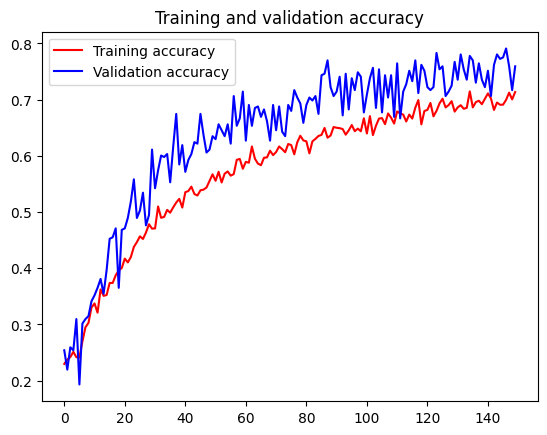

<Figure size 640x480 with 0 Axes>

In [5]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [11]:
import numpy as np
from keras.preprocessing import image

uploaded = [
  "./data/short_test/test/WIN_20221117_19_27_18_Pro.jpg",
  "./data/short_test/test/WIN_20221117_19_42_51_Pro.jpg",
  "./data/short_test/test/WIN_20221117_19_42_57_Pro.jpg",
  "./data/test/sadness/sadness10.jpg",
  "./data/test/surprise/surprise10.jpg",
  "./data/test/fear/fear105.jpg",
]

labels = [
  3,
  5,
  4,
  5,
  6,
  2
]


for fn in uploaded:
 
  # predicting images
  path = fn
  # img = image.load_img(path, target_size=(150, 150))
  img = tf.keras.utils.load_img(path, target_size=(180, 180))
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)
  print(np.argmax(classes[0]) == labels[uploaded.index(fn)])

1/1 [==============================] - 0s 19ms/step
./data/short_test/test/WIN_20221117_19_27_18_Pro.jpg
[[1. 0. 0. 0. 0. 0. 0.]]
False
1/1 [==============================] - 0s 23ms/step
./data/short_test/test/WIN_20221117_19_42_51_Pro.jpg
[[1. 0. 0. 0. 0. 0. 0.]]
False
1/1 [==============================] - 0s 22ms/step
./data/short_test/test/WIN_20221117_19_42_57_Pro.jpg
[[1. 0. 0. 0. 0. 0. 0.]]
False
1/1 [==============================] - 0s 22ms/step
./data/test/sadness/sadness10.jpg
[[0. 0. 0. 0. 0. 1. 0.]]
True
1/1 [==============================] - 0s 29ms/step
./data/test/surprise/surprise10.jpg
[[0. 0. 0. 0. 0. 0. 1.]]
True
1/1 [==============================] - 0s 24ms/step
./data/test/fear/fear105.jpg
[[0. 0. 0. 0. 0. 0. 1.]]
False
